In [1]:
!pip install geopandas
!pip install matplotlib
!pip install pandas

In [2]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.3 MB/s eta 0:00:00


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import pandas as pd
import warnings
import cartopy.feature as cfeature
import geopandas as gpd
import json

%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
#Leer mapa vectorial del Perú con regiones
map_df = gpd.read_file('/content/peru_departamental_simple.geojson')
map_df.head()


,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976..."
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589..."
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6..."
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4..."
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2..."


In [9]:
#Leer población por regiones
data_df = pd.DataFrame(pd.read_excel('/content/poblacion2020.xlsx'))
data_df

,UBIGEO,DEPARTAMENTO,TOTAL
0,1,AMAZONAS,426806
1,2,ANCASH,1180638
2,3,APURIMAC,430736
3,4,AREQUIPA,1497438
4,5,AYACUCHO,668213
5,6,CAJAMARCA,1453711
6,7,CALLAO,1129854
7,8,CUSCO,1357075
8,9,HUANCAVELICA,365317
9,10,HUANUCO,760267


In [10]:
#Unir DataFrames
df_final = map_df.merge(data_df, how = 'inner', left_on = 'NOMBDEP', right_on = 'DEPARTAMENTO', suffixes = ("","_2"))
df_final.head()

,NOMBDEP,COUNT,FIRST_IDDP,HECTARES,geometry,UBIGEO,DEPARTAMENTO,TOTAL
0,AMAZONAS,84,01,3930646.567,"POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...",1,AMAZONAS,426806
1,ANCASH,166,02,3596224.600,"POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...",2,ANCASH,1180638
2,APURIMAC,80,03,2111415.170,"POLYGON ((-72.47177 -14.66140, -72.57725 -14.6...",3,APURIMAC,430736
3,AREQUIPA,109,04,6325588.935,"POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...",4,AREQUIPA,1497438
4,AYACUCHO,111,05,4350381.783,"POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...",5,AYACUCHO,668213


In [11]:
data_df = data_df[['DEPARTAMENTO', 'TOTAL']]
data_df.head()

,DEPARTAMENTO,TOTAL
0,AMAZONAS,426806
1,ANCASH,1180638
2,APURIMAC,430736
3,AREQUIPA,1497438
4,AYACUCHO,668213


<Axes: >

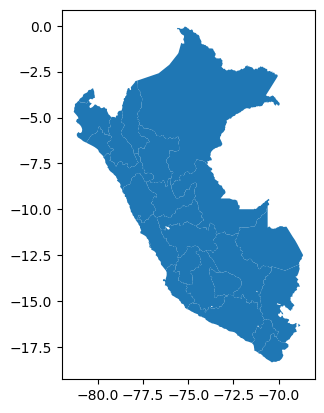

In [12]:
#Las columnas que nos interesan
df_final = df_final[['DEPARTAMENTO', 'TOTAL', 'geometry']]
df_final.plot()